# TRMM

The dataset used in this notebook is TRMM with daily values (from NASA). The data comes in separate files for each day and thus needs to be concatenated before processing.

Using the filter available on https://disc.gsfc.nasa.gov/SSW/#keywords=TRMM_3B42_Daily%207, the relevant geographical area can be extracted and the daily files downloaded. For the area, paste **5.125,62.375,39.875,97.125** to extract the exact spatial region used in the V. Stolbovas PhD thesis. For the variables, check only **precipitation** and subset the dataset.

If logged in with the earthdata account, the dataset can then be downloaded. Login can be found at https://urs.earthdata.nasa.gov/.

**Resources**

- Official TRMM README
- https://disc.gsfc.nasa.gov/datasets/TRMM_3B42_Daily_7/summary
- https://disc.gsfc.nasa.gov/SSW/#keywords=TRMM_3B42_Daily%207
- https://disc2.gesdisc.eosdis.nasa.gov/opendap/TRMM_L3/TRMM_3B42_Daily.7/
- https://disc.gsfc.nasa.gov/SSW/SSW_URL_List_Downloading_Instructions.html
- https://wiki.earthdata.nasa.gov/display/HDD/Wget+with+URS+Authentication#WgetwithURSAuthentication-Step-by-stepguide

**Citation**

Goddard Earth Sciences Data and Information Services Center(2016), TRMM (TMPA) Precipitation L3 1 day 0.25 degree x 0.25 degree V7, , Goddard Earth Sciences Data and Information Services Center (GES DISC), Accessed [21.08.2017] https://disc.gsfc.nasa.gov/datacollection/TRMM_3B42_Daily_7.html


61.75,4.5,97.75,40.5
- https://giovanni.gsfc.nasa.gov/giovanni/#service=TmAvMp&starttime=1997-12-31T00:00:00Z&endtime=2017-09-29T23:59:59Z&bbox=61.75,4.5,97.75,40.5&data=TRMM_3B42_Daily_7_precipitation&dataKeyword=trmm
- https://disc.sci.gsfc.nasa.gov/datasets?page=1&keywords=TRMM%203B42&start=1920-01-01&end=2016-06-27
- https://disc.sci.gsfc.nasa.gov/data-access

## Dependencies

To get all the dependencies needed for this project, import the corresponding conda environment file:
- **conda-gpu.env** for Tensorflow with GPU support
- **conda.env** for Tensorflow without GPU support

In [1]:
# statistical libraries
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx

# visualization libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly
import plotly.plotly as py
from plotly.graph_objs import Scatter, Layout
import cartopy.crs as ccrs

# import own library functionality
import paths
from TRMM import TRMM
from Visualization import Visualization

# force autoreload of external modules on save
%load_ext autoreload
%autoreload 2
%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)

## Load the dataset

In [2]:
# how many years to load data for
# cannot yet use 2017 as the data for december is not complete
# TODO: extend with 2018 as soon as data is available
YEARS = range(1998, 2017)

# pre-monsoon period
MAM = [3, 4, 5]

# monsoon period
JJAS = [6, 7, 8, 9]

# post-monsoon period
OND = [10, 11, 12]

# run the aggregation algorithm over the dataframes?
# the resulting dataframe would be exorbitantly big otherwise
AGGREGATION_RESOLUTION = 0.75

In [3]:
# load data for the pre-monsoon period (MAM)

mam_df = TRMM.load_dataset(
    YEARS,
    MAM,
    aggregation_resolution=AGGREGATION_RESOLUTION,
    timestamp=True,
    invalidate=False,
    lon_slice=slice(61.125, 97.625),
    lat_slice=slice(4.125, 40.625),
    version='v3')

> Loading from cache...


In [4]:
# load data for the monsoon period (JJAS)

jjas_df = TRMM.load_dataset(
    YEARS,
    JJAS,
    aggregation_resolution=AGGREGATION_RESOLUTION,
    timestamp=True,
    invalidate=False,
    lon_slice=slice(61.125, 97.625),
    lat_slice=slice(4.125, 40.625),
    version='v3')

> Loading from cache...


In [5]:
# load data for the post-monsoon period (OND)

ond_df = TRMM.load_dataset(
    YEARS,
    OND,
    aggregation_resolution=AGGREGATION_RESOLUTION,
    timestamp=True,
    invalidate=False,
    lon_slice=slice(61.125, 97.625),
    lat_slice=slice(4.125, 40.625),
    version='v3')

> Loading from cache...


## Exploratory Data Analysis

### Pre-Monsoon (MAM)

In [6]:
mam_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2401 entries, (4.375, 61.375) to (40.375, 97.375)
Columns: 1748 entries, 888710400 to 1464652800
dtypes: float64(1748)
memory usage: 32.0 MB


In [7]:
mam_df.tail()

888710400   888796800   888883200   888969600   \
latitude longitude                                                   
40.375   94.375            0.0    0.161115    0.000000    0.000000   
         95.125            0.0    0.516471    0.000000    0.136527   
         95.875            0.0    0.000000    0.000000    0.000000   
         96.625            0.0    0.000000    2.217927    0.000000   
         97.375            0.0    0.000000    1.022686    0.000000   

                    889056000   889142400   889228800   889315200   \
latitude longitude                                                   
40.375   94.375            0.0    0.000000    0.256137         0.0   
         95.125            0.0    0.000000    2.921605         0.0   
         95.875            0.0    0.000000    4.283582         0.0   
         96.625            0.0    1.068078    0.000000         0.0   
         97.375            0.0   13.621249    1.471204         0.0   

                    889401600   889488000      ...      1463875200  \
latitude longitude                             ...                   
40.375   94.375            0.0         0.0     ...            0.00   
         95.125            0.0         0.0     ...            0.00   
         95.875            0.0         0.0     ...            0.00   
         96.625            0.0         0.0     ...            0.27   
         97.375            0.0         0.0     ...            0.72   

                    1463961600  1464048000  1464134400  1464220800  \
latitude longitude                                                   
40.375   94.375            0.0         0.0         0.0         0.0   
         95.125            0.0         0.0         0.0         0.0   
         95.875            0.0         0.0         0.0         0.0   
         96.625            0.0         0.0         0.0         0.0   
         97.375            0.0         0.0         0.0         0.0   

                    1464307200  1464393600  1464480000  1464566400  1464652800  
latitude longitude                                                              
40.375   94.375            0.0         0.0         0.0    1.620000    0.000000  
         95.125            0.0         0.0         0.0    5.931863    0.000000  
         95.875            0.0         0.0         0.0    6.750000   11.790000  
         96.625            0.0         0.0         0.0    4.770000   42.299998  
         97.375            0.0         0.0         0.0    6.840000   20.969999  

[5 rows x 1748 columns]

In [8]:
mam_df.unstack(-1).iloc[:5, :5]

888710400                            
longitude    61.375 62.125 62.875 63.625 64.375
latitude                                       
4.375           0.0   5.37   4.02   4.35   0.54
5.125           0.0   0.00   0.00   0.00   1.56
5.875           0.0   0.00   0.00   0.00   0.00
6.625           0.0   0.00   0.00   0.00   0.00
7.375           0.0   0.00   0.00   0.00   0.00

In [9]:
mam_df.iloc[0].quantile(0.9)

104.46599788665769

### Monsoon (JJAS)

In [10]:
jjas_df.tail()

896659200   896745600   896832000   896918400   \
latitude longitude                                                   
40.375   94.375            0.0         0.0         0.0         0.0   
         95.125            0.0         0.0         0.0         0.0   
         95.875            0.0         0.0         0.0         0.0   
         96.625            0.0         0.0         0.0         0.0   
         97.375            0.0         0.0         0.0         0.0   

                    897004800   897091200   897177600   897264000   \
latitude longitude                                                   
40.375   94.375       1.141729    0.000000         0.0         0.0   
         95.125       6.051924    0.000000         0.0         0.0   
         95.875      15.563477    0.000000         0.0         0.0   
         96.625      16.951041    0.115731         0.0         0.0   
         97.375      11.179539    1.619584         0.0         0.0   

                    897350400   897436800      ...      1474416000  \
latitude longitude                             ...                   
40.375   94.375       2.221119    0.000000     ...             0.0   
         95.125       7.571684    0.000000     ...             0.0   
         95.875       5.265064    3.535445     ...             0.0   
         96.625       7.605862    4.686966     ...             0.0   
         97.375       7.397860   20.376898     ...             0.0   

                    1474502400  1474588800  1474675200  1474761600  \
latitude longitude                                                   
40.375   94.375            0.0         0.0         0.0         0.0   
         95.125            0.0         0.0         0.0         0.0   
         95.875            0.0         0.0         0.0         0.0   
         96.625            0.0         0.0         0.0         0.0   
         97.375            0.0         0.0         0.0         0.0   

                    1474848000  1474934400  1475020800  1475107200  1475193600  
latitude longitude                                                              
40.375   94.375       0.000000         0.0         0.0         0.0         0.0  
         95.125       0.180000         0.0         0.0         0.0         0.0  
         95.875       0.360000         0.0         0.0         0.0         0.0  
         96.625       0.000000         0.0         0.0         0.0         0.0  
         97.375       1.067942         0.0         0.0         0.0         0.0  

[5 rows x 2318 columns]

In [11]:
jjas_df.unstack(-1).iloc[:5, :5]

896659200                            
longitude    61.375 62.125 62.875 63.625 64.375
latitude                                       
4.375          0.00   0.00   0.03   0.18   0.00
5.125          0.18   0.00   2.49   0.00   0.48
5.875          0.24   0.87   1.59   0.00   0.81
6.625          0.03   0.54   0.99   2.31   6.60
7.375          0.00   0.90   0.18   1.83   1.26

In [12]:
jjas_df.iloc[0].quantile(0.9)

78.44699873924257

### Post-Monsoon (OND)

In [13]:
ond_df.tail()

907200000   907286400   907372800   907459200   \
latitude longitude                                                   
40.375   94.375            0.0         0.0         0.0         0.0   
         95.125            0.0         0.0         0.0         0.0   
         95.875            0.0         0.0         0.0         0.0   
         96.625            0.0         0.0         0.0         0.0   
         97.375            0.0         0.0         0.0         0.0   

                    907545600   907632000   907718400   907804800   \
latitude longitude                                                   
40.375   94.375            0.0         0.0         0.0         0.0   
         95.125            0.0         0.0         0.0         0.0   
         95.875            0.0         0.0         0.0         0.0   
         96.625            0.0         0.0         0.0         0.0   
         97.375            0.0         0.0         0.0         0.0   

                    907891200   907977600      ...      1482364800  \
latitude longitude                             ...                   
40.375   94.375            0.0       0.000     ...             0.0   
         95.125            0.0       1.152     ...             0.0   
         95.875            0.0       3.582     ...             0.0   
         96.625            0.0       1.218     ...             0.0   
         97.375            0.0       0.756     ...             0.0   

                    1482451200  1482537600  1482624000  1482710400  \
latitude longitude                                                   
40.375   94.375       4.914773         0.0         0.0         0.0   
         95.125       0.749344         0.0         0.0         0.0   
         95.875       0.000000         0.0         0.0         0.0   
         96.625       0.000000         0.0         0.0         0.0   
         97.375       0.000000         0.0         0.0         0.0   

                    1482796800  1482883200  1482969600  1483056000  1483142400  
latitude longitude                                                              
40.375   94.375            0.0         0.0         0.0         0.0         0.0  
         95.125            0.0         0.0         0.0         0.0         0.0  
         95.875            0.0         0.0         0.0         0.0         0.0  
         96.625            0.0         0.0         0.0         0.0         0.0  
         97.375            0.0         0.0         0.0         0.0         0.0  

[5 rows x 1748 columns]

In [14]:
ond_df.unstack(-1).iloc[:5, :5]

907200000                                               
longitude     61.375     62.125      62.875      63.625      64.375
latitude                                                           
4.375      28.890000  18.209999   81.119998  130.979993  138.509996
5.125      32.309999  50.159998  102.479995  103.859995   54.359998
5.875      12.330000  46.919999   71.399997   72.089999   69.029996
6.625       3.360000   7.230000   24.150000   72.299999   58.860000
7.375       0.000000   0.120000    0.240000    6.210000   20.910000

In [15]:
ond_df.iloc[0].quantile(0.9)

144.0569965839386

## Extraction of Extreme Events

Events are regarded as extreme events if they fall above the 90% quantile of the entire time-series.

In [16]:
EE_QUANTILE = 0.9

### Pre-Monsoon (MAM)

In [17]:
# extract extreme events from the dataset
# results in a matrix of boolean values for Extreme/Non-Extreme

mam_extreme_events = TRMM.extract_extreme_events(mam_df, quantile=EE_QUANTILE)
mam_extreme_events.head()

0             888710400     888796800     888883200     \
latitude longitude                                                           
4.375    61.375             True         False         False         False   
         62.125             True         False         False         False   
         62.875             True         False         False         False   
         63.625             True         False         False         False   
         64.375             True         False         False         False   

                    888969600     889056000     889142400     889228800     \
latitude longitude                                                           
4.375    61.375            False         False         False         False   
         62.125            False         False         False         False   
         62.875            False         False         False         False   
         63.625            False         False         False         False   
         64.375            False         False         False         False   

                    889315200     889401600         ...       1463961600    \
latitude longitude                                  ...                      
4.375    61.375            False         False      ...              False   
         62.125            False         False      ...              False   
         62.875            False         False      ...              False   
         63.625            False         False      ...              False   
         64.375            False         False      ...              False   

                    1464048000    1464134400    1464220800    1464307200    \
latitude longitude                                                           
4.375    61.375            False         False         False         False   
         62.125            False         False         False         False   
         62.875            False         False         False         False   
         63.625            False         False         False         False   
         64.375            False         False         False         False   

                    1464393600    1464480000    1464566400    1464652800    \
latitude longitude                                                           
4.375    61.375            False         False         False         False   
         62.125            False         False         False         False   
         62.875            False         False         False         False   
         63.625            False         False         False         False   
         64.375            False         False         False         False   

                    999999999999  
latitude longitude                
4.375    61.375             True  
         62.125             True  
         62.875             True  
         63.625             True  
         64.375             True  

[5 rows x 1750 columns]

In [18]:
# print only the events that are extreme for the very first row

mam_extreme_events.iloc[0][mam_extreme_events.iloc[0]].head()

0            True
890265600    True
891043200    True
891216000    True
892598400    True
Name: (4.375, 61.375), dtype: bool

### Monsoon (JJAS)

In [19]:
# calculate extreme events for JJAS

jjas_extreme_events = TRMM.extract_extreme_events(jjas_df, quantile=EE_QUANTILE)
jjas_extreme_events.head()

0             896659200     896745600     896832000     \
latitude longitude                                                           
4.375    61.375             True         False         False         False   
         62.125             True         False         False         False   
         62.875             True         False         False         False   
         63.625             True         False         False         False   
         64.375             True         False         False         False   

                    896918400     897004800     897091200     897177600     \
latitude longitude                                                           
4.375    61.375            False         False         False         False   
         62.125            False         False         False         False   
         62.875            False         False         False         False   
         63.625            False         False         False         False   
         64.375            False         False         False         False   

                    897264000     897350400         ...       1474502400    \
latitude longitude                                  ...                      
4.375    61.375            False         False      ...              False   
         62.125            False         False      ...              False   
         62.875            False         False      ...              False   
         63.625            False         False      ...              False   
         64.375            False         False      ...              False   

                    1474588800    1474675200    1474761600    1474848000    \
latitude longitude                                                           
4.375    61.375            False         False         False         False   
         62.125            False         False         False         False   
         62.875            False         False         False         False   
         63.625            False         False         False         False   
         64.375            False         False         False         False   

                    1474934400    1475020800    1475107200    1475193600    \
latitude longitude                                                           
4.375    61.375            False         False         False         False   
         62.125            False         False         False         False   
         62.875            False         False         False         False   
         63.625            False         False         False         False   
         64.375            False         False         False         False   

                    999999999999  
latitude longitude                
4.375    61.375             True  
         62.125             True  
         62.875             True  
         63.625             True  
         64.375             True  

[5 rows x 2320 columns]

In [20]:
# print only the events that are extreme for the very first row

jjas_extreme_events.iloc[0][jjas_extreme_events.iloc[0]].head()

0            True
898732800    True
898819200    True
899078400    True
899164800    True
Name: (4.375, 61.375), dtype: bool

### Post-Monsoon (OND)

In [21]:
# calculate extreme events for OND

ond_extreme_events = TRMM.extract_extreme_events(ond_df, quantile=EE_QUANTILE)
ond_extreme_events.head()

0             907200000     907286400     907372800     \
latitude longitude                                                           
4.375    61.375             True         False          True         False   
         62.125             True         False          True         False   
         62.875             True         False          True         False   
         63.625             True         False          True          True   
         64.375             True         False          True         False   

                    907459200     907545600     907632000     907718400     \
latitude longitude                                                           
4.375    61.375            False         False          True          True   
         62.125            False         False          True          True   
         62.875            False         False         False          True   
         63.625            False         False         False          True   
         64.375            False         False         False          True   

                    907804800     907891200         ...       1482451200    \
latitude longitude                                  ...                      
4.375    61.375            False         False      ...              False   
         62.125            False         False      ...              False   
         62.875            False         False      ...              False   
         63.625            False         False      ...              False   
         64.375            False         False      ...              False   

                    1482537600    1482624000    1482710400    1482796800    \
latitude longitude                                                           
4.375    61.375            False         False         False         False   
         62.125            False         False         False         False   
         62.875            False         False         False         False   
         63.625            False         False         False         False   
         64.375            False         False         False         False   

                    1482883200    1482969600    1483056000    1483142400    \
latitude longitude                                                           
4.375    61.375            False         False         False         False   
         62.125            False         False         False         False   
         62.875            False         False         False         False   
         63.625            False         False         False         False   
         64.375            False         False         False         False   

                    999999999999  
latitude longitude                
4.375    61.375             True  
         62.125             True  
         62.875             True  
         63.625             True  
         64.375             True  

[5 rows x 1750 columns]

In [22]:
# print only the events that are extreme for the very first row
ond_extreme_events.iloc[0][ond_extreme_events.iloc[0]].head()

0            True
907286400    True
907632000    True
907718400    True
908496000    True
Name: (4.375, 61.375), dtype: bool

## Calculating Event Synchronization

For each pair of grid cells, the level of synchronization in extreme events should be calculated.

### Pre-Monsoon (MAM)

In [23]:
# calculate the synchronization matrix

mam_sync_matrix, mam_count_matrix, mam_split_matrix, mam_runtime = TRMM.calculate_sync_matrix(mam_extreme_events, 'MAM', v2=True)
mam_sync_matrix.iloc[:5, :5]

> Loading from cache...


latitude               4.375                                        
longitude             61.375    62.125    62.875    63.625    64.375
latitude longitude                                                  
4.375    61.375     1.000000  0.765714  0.651429  0.600000  0.571429
         62.125     0.765714  1.000000  0.771429  0.685714  0.634286
         62.875     0.651429  0.771429  1.000000  0.771429  0.674286
         63.625     0.600000  0.685714  0.771429  1.000000  0.760000
         64.375     0.571429  0.634286  0.674286  0.760000  1.000000

In [24]:
mam_count_matrix.iloc[:5, :5]

latitude            4.375                            
longitude          61.375 62.125 62.875 63.625 64.375
latitude longitude                                   
4.375    61.375     175.0  134.0  114.0  105.0  100.0
         62.125     134.0  175.0  135.0  120.0  111.0
         62.875     114.0  135.0  175.0  135.0  118.0
         63.625     105.0  120.0  135.0  175.0  133.0
         64.375     100.0  111.0  118.0  133.0  175.0

In [25]:
mam_split_matrix.iloc[:5, :5]

latitude            4.375                            
longitude          61.375 62.125 62.875 63.625 64.375
latitude longitude                                   
4.375    61.375      87.5   68.0   59.5   52.0   51.0
         62.125      66.0   87.5   68.0   59.0   55.0
         62.875      54.5   67.0   87.5   66.5   59.0
         63.625      53.0   61.0   68.5   87.5   66.5
         64.375      49.0   56.0   59.0   66.5   87.5

In [26]:
mam_sync_matrix.isna().sum().sum()

0

In [27]:
mam_sync_matrix.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2401 entries, (4.375, 61.375) to (40.375, 97.375)
Columns: 2401 entries, (4.375, 61.375) to (40.375, 97.375)
dtypes: float32(2401)
memory usage: 22.1 MB


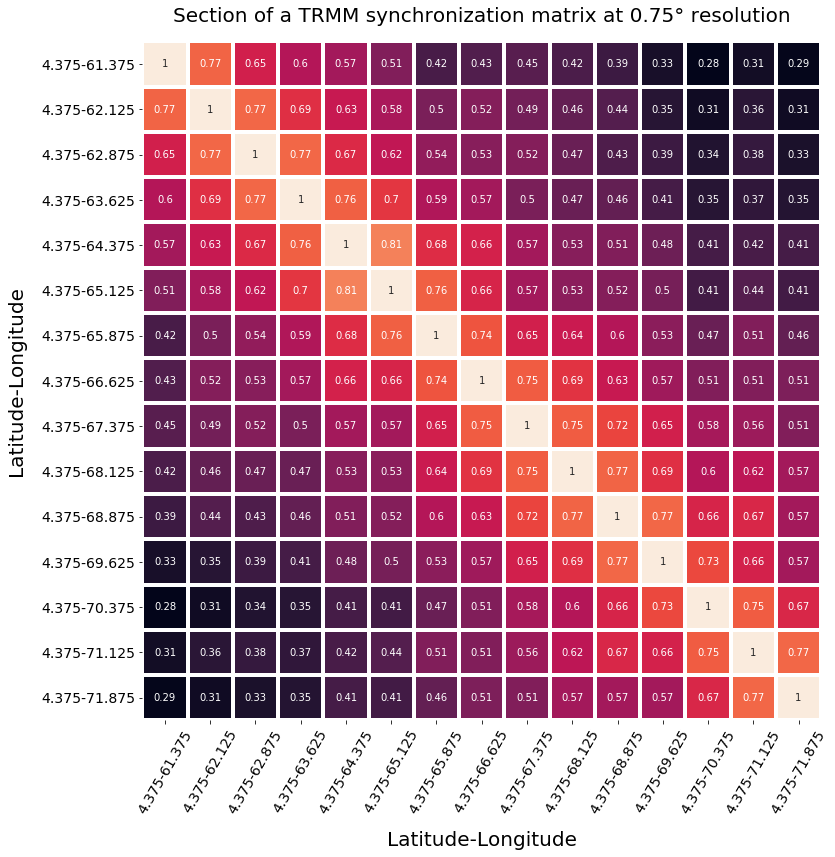

In [28]:
example_matrix = mam_sync_matrix.iloc[:15, :15].copy()

fig = plt.figure(figsize=(12, 12))
# cbar_kws=dict(fraction=0.046, pad=0.04, label='Strength of synchronization')
ax = sns.heatmap(example_matrix, square=True, annot=True, cbar=False, linewidths=3)

ax.set_ylabel('Latitude-Longitude', size=20, labelpad=15)
ax.set_xlabel('Latitude-Longitude', size=20, labelpad=15)
ax.set_xmargin(0)
ax.set_ymargin(0)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14, rotation=0)
ax.autoscale_view()
ttl = ax.set_title('Section of a TRMM synchronization matrix at 0.75° resolution', size=20)
ttl.set_position([0.5, 1.02])
plt.tight_layout()
plt.savefig('output/trmm_sync_example.png', bbox_inches='tight')

In [29]:
np.fill_diagonal(example_matrix.values, np.nan)
gt = np.nanpercentile(example_matrix, 80)
gt

0.6697142720222474

In [30]:
np.fill_diagonal(example_matrix.values, 0)
example_matrix[example_matrix < gt] = 0
example_matrix[example_matrix >= gt] = 1

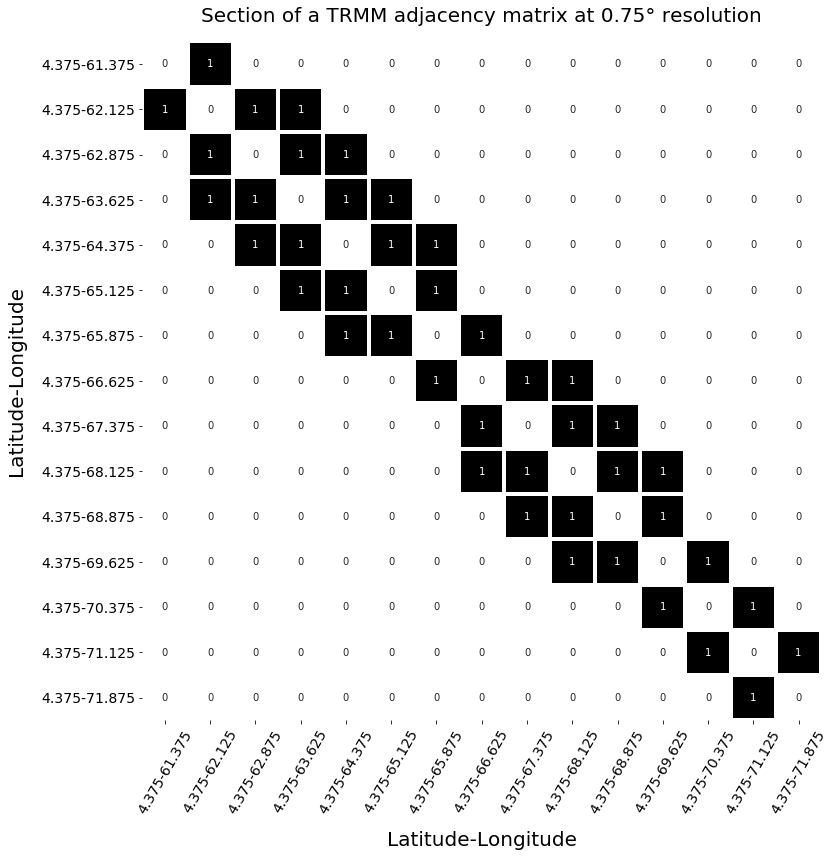

In [31]:
fig = plt.figure(figsize=(12, 12))
# cbar_kws=dict(fraction=0.046, pad=0.04, label='Strength of synchronization')
ax = sns.heatmap(example_matrix, square=True, annot=True, cbar=False, linewidths=3, cmap='binary')
ax.set_ylabel('Latitude-Longitude', size=20, labelpad=15)
ax.set_xlabel('Latitude-Longitude', size=20, labelpad=15)
ax.set_xmargin(0)
ax.set_ymargin(0)
plt.xticks(fontsize=14, rotation=60)
plt.yticks(fontsize=14, rotation=0)
ax.autoscale_view()
ttl = ax.set_title('Section of a TRMM adjacency matrix at 0.75° resolution', size=20)
ttl.set_position([0.5, 1.02])
plt.tight_layout()

plt.savefig('output/trmm_adjacency_example.png', bbox_inches='tight')

### Monsoon (JJAS)

In [32]:
# calculate sync and count matrices for JJAS

jjas_sync_matrix, jjas_count_matrix, jjas_split_matrix, jjas_runtime = TRMM.calculate_sync_matrix(jjas_extreme_events, 'JJAS', v2=True)
jjas_sync_matrix.iloc[:5, :5]

> Loading from cache...


latitude               4.375                                        
longitude             61.375    62.125    62.875    63.625    64.375
latitude longitude                                                  
4.375    61.375     1.000000  0.767241  0.642241  0.556035  0.521552
         62.125     0.767241  1.000000  0.775862  0.659483  0.599138
         62.875     0.642241  0.775862  1.000000  0.750000  0.668103
         63.625     0.556035  0.659483  0.750000  1.000000  0.806035
         64.375     0.521552  0.599138  0.668103  0.806035  1.000000

In [33]:
jjas_count_matrix.iloc[:5, :5]

latitude            4.375                            
longitude          61.375 62.125 62.875 63.625 64.375
latitude longitude                                   
4.375    61.375     232.0  178.0  149.0  129.0  121.0
         62.125     178.0  232.0  180.0  153.0  139.0
         62.875     149.0  180.0  232.0  174.0  155.0
         63.625     129.0  153.0  174.0  232.0  187.0
         64.375     121.0  139.0  155.0  187.0  232.0

In [34]:
jjas_split_matrix.iloc[:5, :5]

latitude            4.375                            
longitude          61.375 62.125 62.875 63.625 64.375
latitude longitude                                   
4.375    61.375     116.0   92.0   76.5   67.0   64.5
         62.125      86.0  116.0   89.5   77.0   72.5
         62.875      72.5   90.5  116.0   87.0   77.5
         63.625      62.0   76.0   87.0  116.0   93.5
         64.375      56.5   66.5   77.5   93.5  116.0

In [35]:
jjas_sync_matrix.isna().sum().sum()

0

In [36]:
jjas_sync_matrix.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2401 entries, (4.375, 61.375) to (40.375, 97.375)
Columns: 2401 entries, (4.375, 61.375) to (40.375, 97.375)
dtypes: float32(2401)
memory usage: 22.1 MB


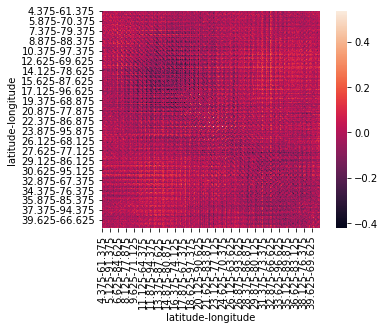

In [37]:
sns.heatmap(jjas_sync_matrix - mam_sync_matrix, square=True)

### Post-Monsoon (OND)

In [38]:
# calculate sync and count matrices for OND

ond_sync_matrix, ond_count_matrix, ond_split_matrix, ond_runtime = TRMM.calculate_sync_matrix(ond_extreme_events, 'OND', v2=True)
ond_sync_matrix.iloc[:5, :5]

> Loading from cache...


latitude               4.375                                        
longitude             61.375    62.125    62.875    63.625    64.375
latitude longitude                                                  
4.375    61.375     1.000000  0.771429  0.657143  0.582857  0.502857
         62.125     0.771429  1.000000  0.754286  0.662857  0.542857
         62.875     0.657143  0.754286  1.000000  0.777143  0.628571
         63.625     0.582857  0.662857  0.777143  1.000000  0.760000
         64.375     0.502857  0.542857  0.628571  0.760000  1.000000

In [39]:
ond_count_matrix.iloc[:5, :5]

latitude            4.375                            
longitude          61.375 62.125 62.875 63.625 64.375
latitude longitude                                   
4.375    61.375     175.0  135.0  115.0  102.0   88.0
         62.125     135.0  175.0  132.0  116.0   95.0
         62.875     115.0  132.0  175.0  136.0  110.0
         63.625     102.0  116.0  136.0  175.0  133.0
         64.375      88.0   95.0  110.0  133.0  175.0

In [40]:
ond_split_matrix.iloc[:5, :5]

latitude            4.375                            
longitude          61.375 62.125 62.875 63.625 64.375
latitude longitude                                   
4.375    61.375      87.5   67.5   56.5   51.5   47.0
         62.125      67.5   87.5   65.5   59.0   48.5
         62.875      58.5   66.5   87.5   67.5   56.5
         63.625      50.5   57.0   68.5   87.5   66.0
         64.375      41.0   46.5   53.5   67.0   87.5

In [41]:
ond_sync_matrix.isna().sum().sum()

0

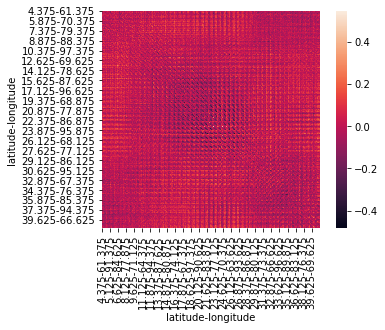

In [42]:
sns.heatmap(jjas_sync_matrix - ond_sync_matrix, square=True)

## Building a Climate Network

Generate a graph representation from the above count matrix. Only draw edges for values above the specified quantile.

In [43]:
NETWORK_QUANTILE = 0.95

### Pre-Monsoon (MAM)

In [44]:
mam_graph = TRMM.generate_graph(mam_sync_matrix, quantile=NETWORK_QUANTILE)
print(len(mam_graph.nodes), len(mam_graph.edges))
print(np.mean([d['weight'] for (x, y, d) in mam_graph.edges(data=True)]))

2401 139986
1.0


In [45]:
mam_graph_w = TRMM.generate_graph(mam_sync_matrix, quantile=NETWORK_QUANTILE, set_ge=None)
print(len(mam_graph_w.nodes), len(mam_graph_w.edges))
print(np.mean([d['weight'] for (x, y, d) in mam_graph_w.edges(data=True)]))

2401 139986
0.4770555258360987


In [46]:
mam_graph_dir = TRMM.generate_graph(mam_split_matrix, quantile=NETWORK_QUANTILE, directed=True)
print(len(mam_graph_dir.nodes), len(mam_graph_dir.edges))
print(np.mean([d['weight'] for (x, y, d) in mam_graph_dir.edges(data=True)]))

2401 283564
1.0


In [47]:
mam_graph_dir_w = TRMM.generate_graph(mam_split_matrix, quantile=NETWORK_QUANTILE, directed=True, set_ge=None)
print(len(mam_graph_dir_w.nodes), len(mam_graph_dir_w.edges))
print(np.mean([d['weight'] for (x, y, d) in mam_graph_dir_w.edges(data=True)]))

2401 283564
41.74398019494717


In [48]:
mam_cent_degree, mam_cent_between, mam_pagerank = TRMM.calculate_centrality(mam_graph)
mam_cent_degree_w, mam_cent_between_w, mam_pagerank_w = TRMM.calculate_centrality(mam_graph_w, weighted=True)
mam_cent_degree_dir, mam_cent_between_dir, mam_pagerank_dir = TRMM.calculate_centrality(mam_graph_dir)
mam_cent_degree_dir_w, mam_cent_between_dir_w, mam_pagerank_dir_w = TRMM.calculate_centrality(mam_graph_dir_w, weighted=True)

In [49]:
mam_graph_90 = TRMM.generate_graph(mam_sync_matrix, quantile=0.9)
mam_graph_w_90 = TRMM.generate_graph(mam_sync_matrix, quantile=0.9, set_ge=None)
mam_graph_dir_90 = TRMM.generate_graph(mam_split_matrix, quantile=0.9, directed=True)
mam_graph_dir_w_90 = TRMM.generate_graph(mam_split_matrix, quantile=0.9, directed=True, set_ge=None)

mam_cent_degree_90, mam_cent_between_90, mam_pagerank_90 = TRMM.calculate_centrality(mam_graph_90)
mam_cent_degree_w_90, mam_cent_between_w_90, mam_pagerank_w_90 = TRMM.calculate_centrality(mam_graph_w_90, weighted=True)
mam_cent_degree_dir_90, mam_cent_between_dir_90, mam_pagerank_dir_90 = TRMM.calculate_centrality(mam_graph_dir_90)
mam_cent_degree_dir_w_90, mam_cent_between_dir_w_90, mam_pagerank_dir_w_90 = TRMM.calculate_centrality(mam_graph_dir_w_90, weighted=True)

#### Degree

In [50]:
mam_cent_degree.head(3)

,lat,lon,val,text,val_0to1,val_std
0,4.375,61.375,39,"(4.375, 61.375)=39.0000",0.121406,-1.433600
1,4.375,62.125,51,"(4.375, 62.125)=51.0000",0.159744,-1.211927
2,4.375,62.875,54,"(4.375, 62.875)=54.0000",0.169329,-1.156509


In [51]:
mam_cent_degree_w.head(3)

,lat,lon,val,text,val_0to1,val_std
0,4.375,61.375,19.765714,"(4.375, 61.375)=19.7657",0.116348,-1.290208
1,4.375,62.125,25.845714,"(4.375, 62.125)=25.8457",0.152941,-1.071468
2,4.375,62.875,27.188572,"(4.375, 62.875)=27.1886",0.161023,-1.023156


In [52]:
mam_cent_degree.pivot(index='lat', columns='lon', values='val').iloc[:5, :5]

lon,61.375,62.125,62.875,63.625,64.375
lat,,,,,
4.375,39,51,54,55,65
5.125,47,49,63,74,71
5.875,56,58,73,72,86
6.625,68,82,97,106,97
7.375,76,90,103,113,124


In [53]:
mam_cent_degree[['val', 'val_std']].describe()

,val,val_std
count,2401.000000,2.401000e+03
mean,116.606414,-1.894916e-16
std,54.133943,1.000000e+00
min,1.000000,-2.135562e+00
25%,80.000000,-6.762192e-01
50%,110.000000,-1.220383e-01
75%,143.000000,4.875608e-01
max,314.000000,3.646392e+00


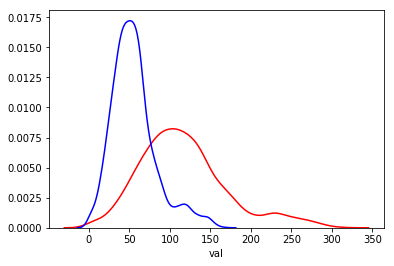

In [54]:
sns.distplot(mam_cent_degree['val'], hist=False, color='r')
sns.distplot(mam_cent_degree_w['val'], hist=False, color='b')

#### Betweenness

In [55]:
mam_cent_between.head(3)

,lat,lon,val,text,val_0to1,val_std
0,4.375,61.375,0.925235,"(4.375, 61.375)=0.9252",0.000006,-0.419695
1,4.375,62.125,2.610225,"(4.375, 62.125)=2.6102",0.000017,-0.419472
2,4.375,62.875,13.187384,"(4.375, 62.875)=13.1874",0.000086,-0.418073


In [56]:
mam_cent_between_w.head(3)

,lat,lon,val,text,val_0to1,val_std
0,4.375,61.375,0.000000,"(4.375, 61.375)=0.0000",0.000000,-0.490081
1,4.375,62.125,0.500000,"(4.375, 62.125)=0.5000",0.000004,-0.490004
2,4.375,62.875,65.985714,"(4.375, 62.875)=65.9857",0.000524,-0.479896


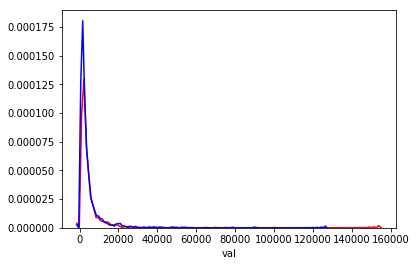

In [57]:
sns.distplot(mam_cent_between['val'], hist=False, color='r')
sns.distplot(mam_cent_between_w['val'], hist=False, color='b')

#### PageRank

In [58]:
mam_pagerank.head(3)

,lat,lon,val,text,val_0to1,val_std
0,4.375,61.375,0.000185,"(4.375, 61.375)=0.0002",0.125393,-2.053516
1,4.375,62.125,0.000217,"(4.375, 62.125)=0.0002",0.170676,-1.766660
2,4.375,62.875,0.000227,"(4.375, 62.875)=0.0002",0.184108,-1.681572


In [59]:
mam_pagerank_w.head(3)

,lat,lon,val,text,val_0to1,val_std
0,4.375,61.375,0.000190,"(4.375, 61.375)=0.0002",0.139434,-1.999248
1,4.375,62.125,0.000225,"(4.375, 62.125)=0.0002",0.188023,-1.693067
2,4.375,62.875,0.000233,"(4.375, 62.875)=0.0002",0.199942,-1.617967


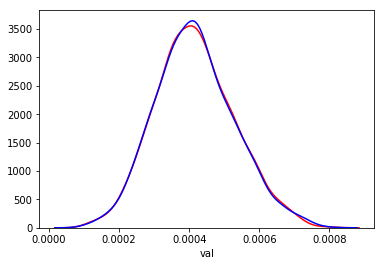

In [60]:
sns.distplot(mam_pagerank['val'], hist=False, color='r')
sns.distplot(mam_pagerank_w['val'], hist=False, color='b')

### Monsoon (JJAS)

In [61]:
jjas_graph = TRMM.generate_graph(jjas_sync_matrix, quantile=NETWORK_QUANTILE)
print(len(jjas_graph.nodes), len(jjas_graph.edges))
print(np.mean([d['weight'] for (x, y, d) in jjas_graph.edges(data=True)]))

2401 137888
1.0


In [62]:
jjas_graph_w = TRMM.generate_graph(jjas_sync_matrix, quantile=NETWORK_QUANTILE, set_ge=None)
print(len(jjas_graph_w.nodes), len(jjas_graph_w.edges))
print(np.mean([d['weight'] for (x, y, d) in jjas_graph_w.edges(data=True)]))

2401 137888
0.41409638556562073


In [63]:
jjas_graph_dir = TRMM.generate_graph(jjas_split_matrix, quantile=NETWORK_QUANTILE, directed=True)
print(len(jjas_graph_dir.nodes), len(jjas_graph_dir.edges))
print(np.mean([d['weight'] for (x, y, d) in jjas_graph_dir.edges(data=True)]))

2401 273832
1.0


In [ ]:
jjas_graph_dir_w = TRMM.generate_graph(jjas_split_matrix, quantile=NETWORK_QUANTILE, directed=True, set_ge=None)
print(len(jjas_graph_dir_w.nodes), len(jjas_graph_dir_w.edges))
print(np.mean([d['weight'] for (x, y, d) in jjas_graph_dir_w.edges(data=True)]))

2401 273832
48.42262956849455


In [ ]:
jjas_cent_degree, jjas_cent_between, jjas_pagerank = TRMM.calculate_centrality(jjas_graph)
jjas_cent_degree_w, jjas_cent_between_w, jjas_pagerank_w = TRMM.calculate_centrality(jjas_graph_w, weighted=True)
jjas_cent_degree_dir, jjas_cent_between_dir, jjas_pagerank_dir = TRMM.calculate_centrality(jjas_graph_dir)
jjas_cent_degree_dir_w, jjas_cent_between_dir_w, jjas_pagerank_dir_w = TRMM.calculate_centrality(jjas_graph_dir_w, weighted=True)

In [ ]:
jjas_graph_90 = TRMM.generate_graph(jjas_sync_matrix, quantile=0.9)
jjas_graph_w_90 = TRMM.generate_graph(jjas_sync_matrix, quantile=0.9, set_ge=None)
jjas_graph_dir_90 = TRMM.generate_graph(jjas_split_matrix, quantile=0.9, directed=True)
jjas_graph_dir_w_90 = TRMM.generate_graph(jjas_split_matrix, quantile=0.9, directed=True, set_ge=None)

jjas_cent_degree_90, jjas_cent_between_90, jjas_pagerank_90 = TRMM.calculate_centrality(jjas_graph_90)
jjas_cent_degree_w_90, jjas_cent_between_w_90, jjas_pagerank_w_90 = TRMM.calculate_centrality(jjas_graph_w_90, weighted=True)
jjas_cent_degree_dir_90, jjas_cent_between_dir_90, jjas_pagerank_dir_90 = TRMM.calculate_centrality(jjas_graph_dir_90)
jjas_cent_degree_dir_w_90, jjas_cent_between_dir_w_90, jjas_pagerank_dir_w_90 = TRMM.calculate_centrality(jjas_graph_dir_w_90, weighted=True)

### Post-Monsoon (OND)

In [ ]:
ond_graph = TRMM.generate_graph(ond_sync_matrix, quantile=NETWORK_QUANTILE)
print(len(ond_graph.nodes), len(ond_graph.edges))
print(np.mean([d['weight'] for (x, y, d) in ond_graph.edges(data=True)]))

In [ ]:
ond_graph_w = TRMM.generate_graph(ond_sync_matrix, quantile=NETWORK_QUANTILE, set_ge=None)
print(len(ond_graph_w.nodes), len(ond_graph_w.edges))
print(np.mean([d['weight'] for (x, y, d) in ond_graph_w.edges(data=True)]))

In [ ]:
ond_graph_dir = TRMM.generate_graph(ond_split_matrix, quantile=NETWORK_QUANTILE, directed=True)
print(len(ond_graph_dir.nodes), len(ond_graph_dir.edges))
print(np.mean([d['weight'] for (x, y, d) in ond_graph_dir.edges(data=True)]))

In [ ]:
ond_graph_dir_w = TRMM.generate_graph(ond_split_matrix, quantile=NETWORK_QUANTILE, directed=True, set_ge=None)
print(len(ond_graph_dir_w.nodes), len(ond_graph_dir_w.edges))
print(np.mean([d['weight'] for (x, y, d) in ond_graph_dir_w.edges(data=True)]))

In [ ]:
ond_cent_degree, ond_cent_between, ond_pagerank = TRMM.calculate_centrality(ond_graph)
ond_cent_degree_w, ond_cent_between_w, ond_pagerank_w = TRMM.calculate_centrality(ond_graph_w, weighted=True)
ond_cent_degree_dir, ond_cent_between_dir, ond_pagerank_dir = TRMM.calculate_centrality(ond_graph_dir)
ond_cent_degree_dir_w, ond_cent_between_dir_w, ond_pagerank_dir_w = TRMM.calculate_centrality(ond_graph_dir_w, weighted=True)

In [ ]:
ond_graph_90 = TRMM.generate_graph(ond_sync_matrix, quantile=0.9)
ond_graph_w_90 = TRMM.generate_graph(ond_sync_matrix, quantile=0.9, set_ge=None)
ond_graph_dir_90 = TRMM.generate_graph(ond_split_matrix, quantile=0.9, directed=True)
ond_graph_dir_w_90 = TRMM.generate_graph(ond_split_matrix, quantile=0.9, directed=True, set_ge=None)

ond_cent_degree_90, ond_cent_between_90, ond_pagerank_90 = TRMM.calculate_centrality(ond_graph_90)
ond_cent_degree_w_90, ond_cent_between_w_90, ond_pagerank_w_90 = TRMM.calculate_centrality(ond_graph_w_90, weighted=True)
ond_cent_degree_dir_90, ond_cent_between_dir_90, ond_pagerank_dir_90 = TRMM.calculate_centrality(ond_graph_dir_90)
ond_cent_degree_dir_w_90, ond_cent_between_dir_w_90, ond_pagerank_dir_w_90 = TRMM.calculate_centrality(ond_graph_dir_w_90, weighted=True)

### Overview

In [ ]:
sns.distplot(mam_cent_degree['val'], hist=False, color='r')
sns.distplot(jjas_cent_degree['val'], hist=False, color='g')
sns.distplot(ond_cent_degree['val'], hist=False, color='b')
sns.distplot(mam_cent_degree_w['val'], hist=False, color='r')
sns.distplot(jjas_cent_degree_w['val'], hist=False, color='g')
sns.distplot(ond_cent_degree_w['val'], hist=False, color='b')

In [ ]:
sns.distplot(mam_cent_between['val'], hist=False, color='r')
sns.distplot(jjas_cent_between['val'], hist=False, color='g')
sns.distplot(ond_cent_between['val'], hist=False, color='b')

In [ ]:
# applying a log normalization can help with the skewedness
sns.distplot(np.log10(mam_cent_between['val']), hist=False, color='r')
sns.distplot(np.log10(jjas_cent_between['val']), hist=False, color='g')
sns.distplot(np.log10(ond_cent_between['val']), hist=False, color='b')
sns.distplot(np.log10(mam_cent_between_w['val']), hist=False, color='r')
sns.distplot(np.log10(jjas_cent_between_w['val']), hist=False, color='g')
sns.distplot(np.log10(ond_cent_between_w['val']), hist=False, color='b')

In [ ]:
sns.distplot(mam_pagerank['val'], hist=False, color='r')
sns.distplot(jjas_pagerank['val'], hist=False, color='g')
sns.distplot(ond_pagerank['val'], hist=False, color='b')
sns.distplot(mam_pagerank_w['val'], hist=False, color='r')
sns.distplot(jjas_pagerank_w['val'], hist=False, color='g')
sns.distplot(ond_pagerank_w['val'], hist=False, color='b')

In [ ]:
sns.distplot(mam_pagerank_dir['val'], hist=False, color='r')
sns.distplot(jjas_pagerank_dir['val'], hist=False, color='g')
sns.distplot(ond_pagerank_dir['val'], hist=False, color='b')
sns.distplot(mam_pagerank_dir_w['val'], hist=False, color='r')
sns.distplot(jjas_pagerank_dir_w['val'], hist=False, color='g')
sns.distplot(ond_pagerank_dir_w['val'], hist=False, color='b')

## Visualizations

In [ ]:
# global params for all graphs

graph_params = dict(
    gaussian_filtering=0.6,
    cmap='hot_r'
)

### Pre-Monsoon (MAM)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13), subplot_kw=dict(projection=ccrs.PlateCarree()))

Visualization.create_cartopy_vis(mam_cent_degree, ax=axes[0, 0], title='undirected/unweighted', **graph_params)
Visualization.create_cartopy_vis(mam_cent_degree_w, ax=axes[0, 1], title='undirected/weighted', **graph_params)
Visualization.create_cartopy_vis(mam_cent_degree_dir, ax=axes[1, 0], title='directed/unweighted', **graph_params)
Visualization.create_cartopy_vis(mam_cent_degree_dir_w, ax=axes[1, 1], title='directed/weighted', **graph_params)

supttl = fig.suptitle('Degree during the pre-monsoon season (MAM, TRMM@0.75°)', size=20)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_mam_degree.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13), subplot_kw=dict(projection=ccrs.PlateCarree()))

Visualization.create_cartopy_vis(mam_cent_between, ax=axes[0, 0], title='undirected/unweighted', log_norm=True, **graph_params)
Visualization.create_cartopy_vis(mam_cent_between_w, ax=axes[0, 1], title='undirected/weighted', log_norm=True, **graph_params)
Visualization.create_cartopy_vis(mam_cent_between_dir, ax=axes[1, 0], title='directed/unweighted', log_norm=True, **graph_params)
Visualization.create_cartopy_vis(mam_cent_between_dir_w, ax=axes[1, 1], title='directed/weighted', log_norm=True, **graph_params)

supttl = fig.suptitle('Betweenness centrality during the pre-monsoon season (MAM, TRMM@0.75°)', size=20)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_mam_betweenness.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13), subplot_kw=dict(projection=ccrs.PlateCarree()))

Visualization.create_cartopy_vis(mam_pagerank, ax=axes[0, 0], title='undirected/unweighted', **graph_params)
Visualization.create_cartopy_vis(mam_pagerank_w, ax=axes[0, 1], title='undirected/weighted', **graph_params)
Visualization.create_cartopy_vis(mam_pagerank_dir, ax=axes[1, 0], title='directed/unweighted', **graph_params)
Visualization.create_cartopy_vis(mam_pagerank_dir_w, ax=axes[1, 1], title='directed/weighted', **graph_params)

supttl = fig.suptitle('PageRank during the pre-monsoon season (MAM, TRMM@0.75°)', size=20)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_mam_pagerank.png', bbox_inches='tight')

### Monsoon (JJAS)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13), subplot_kw=dict(projection=ccrs.PlateCarree()))

Visualization.create_cartopy_vis(jjas_cent_degree, ax=axes[0, 0], title='undirected/unweighted', **graph_params)
Visualization.create_cartopy_vis(jjas_cent_degree_w, ax=axes[0, 1], title='undirected/weighted', **graph_params)
Visualization.create_cartopy_vis(jjas_cent_degree_dir, ax=axes[1, 0], title='directed/unweighted', **graph_params)
Visualization.create_cartopy_vis(jjas_cent_degree_dir_w, ax=axes[1, 1], title='directed/weighted', **graph_params)

supttl = fig.suptitle('Degree during the monsoon season (JJAS, TRMM@0.75°)', size=20)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_jjas_degree.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13), subplot_kw=dict(projection=ccrs.PlateCarree()))

Visualization.create_cartopy_vis(jjas_cent_between, ax=axes[0, 0], title='undirected/unweighted', log_norm=True, **graph_params)
Visualization.create_cartopy_vis(jjas_cent_between_w, ax=axes[0, 1], title='undirected/weighted', log_norm=True, **graph_params)
Visualization.create_cartopy_vis(jjas_cent_between_dir, ax=axes[1, 0], title='directed/unweighted', log_norm=True, **graph_params)
Visualization.create_cartopy_vis(jjas_cent_between_dir_w, ax=axes[1, 1], title='directed/weighted', log_norm=True, **graph_params)

supttl = fig.suptitle('Betweenness centrality during the monsoon season (JJAS, TRMM@0.75°)', size=20)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_jjas_betweenness.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13), subplot_kw=dict(projection=ccrs.PlateCarree()))

Visualization.create_cartopy_vis(jjas_pagerank, ax=axes[0, 0], title='undirected/unweighted', **graph_params)
Visualization.create_cartopy_vis(jjas_pagerank_w, ax=axes[0, 1], title='undirected/weighted', **graph_params)
Visualization.create_cartopy_vis(jjas_pagerank_dir, ax=axes[1, 0], title='directed/unweighted', **graph_params)
Visualization.create_cartopy_vis(jjas_pagerank_dir_w, ax=axes[1, 1], title='directed/weighted', **graph_params)

supttl = fig.suptitle('PageRank during the monsoon season (JJAS, TRMM@0.75°)', size=20)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_jjas_pagerank.png', bbox_inches='tight')

### Post-Monsoon (OND)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13), subplot_kw=dict(projection=ccrs.PlateCarree()))

Visualization.create_cartopy_vis(ond_cent_degree, ax=axes[0, 0], title='undirected/unweighted', **graph_params)
Visualization.create_cartopy_vis(ond_cent_degree_w, ax=axes[0, 1], title='undirected/weighted', **graph_params)
Visualization.create_cartopy_vis(ond_cent_degree_dir, ax=axes[1, 0], title='directed/unweighted', **graph_params)
Visualization.create_cartopy_vis(ond_cent_degree_dir_w, ax=axes[1, 1], title='directed/weighted', **graph_params)

supttl = fig.suptitle('Degree during the post-monsoon season (OND, TRMM@0.75°)', size=20)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_OND_degree.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13), subplot_kw=dict(projection=ccrs.PlateCarree()))

Visualization.create_cartopy_vis(ond_cent_between, ax=axes[0, 0], title='undirected/unweighted', log_norm=True, **graph_params)
Visualization.create_cartopy_vis(ond_cent_between_w, ax=axes[0, 1], title='undirected/weighted', log_norm=True, **graph_params)
Visualization.create_cartopy_vis(ond_cent_between_dir, ax=axes[1, 0], title='directed/unweighted', log_norm=True, **graph_params)
Visualization.create_cartopy_vis(ond_cent_between_dir_w, ax=axes[1, 1], title='directed/weighted', log_norm=True, **graph_params)

supttl = fig.suptitle('Betweenness centrality during the post-monsoon season (OND, TRMM@0.75°)', size=20)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_OND_betweenness.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13), subplot_kw=dict(projection=ccrs.PlateCarree()))

Visualization.create_cartopy_vis(ond_pagerank, ax=axes[0, 0], title='undirected/unweighted', **graph_params)
Visualization.create_cartopy_vis(ond_pagerank_w, ax=axes[0, 1], title='undirected/weighted', **graph_params)
Visualization.create_cartopy_vis(ond_pagerank_dir, ax=axes[1, 0], title='directed/unweighted', **graph_params)
Visualization.create_cartopy_vis(ond_pagerank_dir_w, ax=axes[1, 1], title='directed/weighted', **graph_params)

supttl = fig.suptitle('PageRank during the post-monsoon season (OND, TRMM@0.75°)', size=20)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_OND_pagerank.png', bbox_inches='tight')

### Overview

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 17), subplot_kw=dict(projection=ccrs.PlateCarree()))

ttl1 = axes[0, 0].set_title('Pre-Monsoon (MAM)', size=20)
ttl2 = axes[0, 1].set_title('Monsoon (JJAS)', size=20)
ttl3 = axes[0, 2].set_title('Post-Monsoon (OND)', size=20)
for ttl in [ttl1, ttl2, ttl3]:
    ttl.set_position([0.5, 1.04])

axes[0, 0].set_ylabel('Degree', rotation=90, size=20, labelpad=15)
axes[1, 0].set_ylabel('Betweenness', rotation=90, size=20, labelpad=15)
axes[2, 0].set_ylabel('PageRank', rotation=90, size=20, labelpad=15)

Visualization.create_cartopy_vis(mam_cent_degree, ax=axes[0, 0], **graph_params)
Visualization.create_cartopy_vis(jjas_cent_degree, ax=axes[0, 1], **graph_params)
Visualization.create_cartopy_vis(ond_cent_degree, ax=axes[0, 2], **graph_params)

Visualization.create_cartopy_vis(mam_cent_between, log_norm=True, ax=axes[1, 0], **graph_params)
Visualization.create_cartopy_vis(jjas_cent_between, log_norm=True, ax=axes[1, 1], **graph_params)
Visualization.create_cartopy_vis(ond_cent_between, log_norm=True, ax=axes[1, 2], **graph_params)

Visualization.create_cartopy_vis(mam_pagerank, ax=axes[2, 0], **graph_params)
Visualization.create_cartopy_vis(jjas_pagerank, ax=axes[2, 1], **graph_params)
Visualization.create_cartopy_vis(ond_pagerank, ax=axes[2, 2], **graph_params)

plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 17), subplot_kw=dict(projection=ccrs.PlateCarree()))

ttl1 = axes[0, 0].set_title('Pre-Monsoon (MAM)', size=20)
ttl2 = axes[0, 1].set_title('Monsoon (JJAS)', size=20)
ttl3 = axes[0, 2].set_title('Post-Monsoon (OND)', size=20)
for ttl in [ttl1, ttl2, ttl3]:
    ttl.set_position([0.5, 1.04])

axes[0, 0].set_ylabel('Degree', rotation=90, size=20, labelpad=15)
axes[1, 0].set_ylabel('Betweenness', rotation=90, size=20, labelpad=15)
axes[2, 0].set_ylabel('PageRank', rotation=90, size=20, labelpad=15)

Visualization.create_cartopy_vis(mam_cent_degree_dir, ax=axes[0, 0], **graph_params)
Visualization.create_cartopy_vis(jjas_cent_degree_dir, ax=axes[0, 1], **graph_params)
Visualization.create_cartopy_vis(ond_cent_degree_dir, ax=axes[0, 2], **graph_params)

Visualization.create_cartopy_vis(mam_cent_between_dir, log_norm=True, ax=axes[1, 0], **graph_params)
Visualization.create_cartopy_vis(jjas_cent_between_dir, log_norm=True, ax=axes[1, 1], **graph_params)
Visualization.create_cartopy_vis(ond_cent_between_dir, log_norm=True, ax=axes[1, 2], **graph_params)

Visualization.create_cartopy_vis(mam_pagerank_dir, ax=axes[2, 0], **graph_params)
Visualization.create_cartopy_vis(jjas_pagerank_dir, ax=axes[2, 1], **graph_params)
Visualization.create_cartopy_vis(ond_pagerank_dir, ax=axes[2, 2], **graph_params)

plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_directed.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 17), subplot_kw=dict(projection=ccrs.PlateCarree()))

ttl1 = axes[0, 0].set_title('Pre-Monsoon (MAM)', size=20)
ttl2 = axes[0, 1].set_title('Monsoon (JJAS)', size=20)
ttl3 = axes[0, 2].set_title('Post-Monsoon (OND)', size=20)
for ttl in [ttl1, ttl2, ttl3]:
    ttl.set_position([0.5, 1.04])

axes[0, 0].set_ylabel('Degree', rotation=90, size=20, labelpad=15)
axes[1, 0].set_ylabel('Betweenness', rotation=90, size=20, labelpad=15)
axes[2, 0].set_ylabel('PageRank', rotation=90, size=20, labelpad=15)

Visualization.create_cartopy_vis(mam_cent_degree_w, ax=axes[0, 0], **graph_params)
Visualization.create_cartopy_vis(jjas_cent_degree_w, ax=axes[0, 1], **graph_params)
Visualization.create_cartopy_vis(ond_cent_degree_w, ax=axes[0, 2], **graph_params)

Visualization.create_cartopy_vis(mam_cent_between_w, ax=axes[1, 0], log_norm=True, **graph_params)
Visualization.create_cartopy_vis(jjas_cent_between_w, ax=axes[1, 1], log_norm=True, **graph_params)
Visualization.create_cartopy_vis(ond_cent_between_w, ax=axes[1, 2], log_norm=True, **graph_params)

Visualization.create_cartopy_vis(mam_pagerank_w, ax=axes[2, 0], **graph_params)
Visualization.create_cartopy_vis(jjas_pagerank_w, ax=axes[2, 1], **graph_params)
Visualization.create_cartopy_vis(ond_pagerank_w, ax=axes[2, 2], **graph_params)

plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_weighted.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 17), subplot_kw=dict(projection=ccrs.PlateCarree()))

ttl1 = axes[0, 0].set_title('Pre-Monsoon (MAM)', size=20)
ttl2 = axes[0, 1].set_title('Monsoon (JJAS)', size=20)
ttl3 = axes[0, 2].set_title('Post-Monsoon (OND)', size=20)
for ttl in [ttl1, ttl2, ttl3]:
    ttl.set_position([0.5, 1.04])

axes[0, 0].set_ylabel('Degree', rotation=90, size=20, labelpad=15)
axes[1, 0].set_ylabel('Betweenness', rotation=90, size=20, labelpad=15)
axes[2, 0].set_ylabel('PageRank', rotation=90, size=20, labelpad=15)

Visualization.create_cartopy_vis(mam_cent_degree_dir_w, ax=axes[0, 0], **graph_params)
Visualization.create_cartopy_vis(jjas_cent_degree_dir_w, ax=axes[0, 1], **graph_params)
Visualization.create_cartopy_vis(ond_cent_degree_dir_w, ax=axes[0, 2], **graph_params)

Visualization.create_cartopy_vis(mam_cent_between_dir_w, log_norm=True, ax=axes[1, 0], **graph_params)
Visualization.create_cartopy_vis(jjas_cent_between_dir_w, log_norm=True, ax=axes[1, 1], **graph_params)
Visualization.create_cartopy_vis(ond_cent_between_dir_w, log_norm=True, ax=axes[1, 2], **graph_params)

Visualization.create_cartopy_vis(mam_pagerank_dir_w, ax=axes[2, 0], **graph_params)
Visualization.create_cartopy_vis(jjas_pagerank_dir_w, ax=axes[2, 1], **graph_params)
Visualization.create_cartopy_vis(ond_pagerank_dir_w, ax=axes[2, 2], **graph_params)

plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_directed_weighted.png', bbox_inches='tight')

# Seasons

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 11), subplot_kw=dict(projection=ccrs.PlateCarree()))

ttl1 = axes[0, 0].set_title('Degree', size=18)
ttl2 = axes[0, 1].set_title('Betweenness', size=18)
ttl3 = axes[0, 2].set_title('PageRank', size=18)
Visualization.create_cartopy_vis(mam_cent_degree, ax=axes[0, 0], **graph_params, clabel='degree')
Visualization.create_cartopy_vis(mam_cent_between, log_norm=True, ax=axes[0, 1], **graph_params, clabel='log( betweenness )')
Visualization.create_cartopy_vis(mam_pagerank_dir, ax=axes[0, 2], **graph_params, clabel='PageRank')

ttl4 = axes[1, 0].set_title('Degree (weighted)', size=18)
ttl5 = axes[1, 1].set_title('Betweenness (weighted)', size=18)
ttl6 = axes[1, 2].set_title('PageRank (weighted)', size=18)
Visualization.create_cartopy_vis(mam_cent_degree_w, ax=axes[1, 0], **graph_params, clabel='weighted degree')
Visualization.create_cartopy_vis(mam_cent_between_w, log_norm=True, ax=axes[1, 1], **graph_params, clabel='log( weighted betweenness )')
Visualization.create_cartopy_vis(mam_pagerank_dir_w, ax=axes[1, 2], **graph_params, clabel='weighted PageRank')

for title in [ttl1, ttl2, ttl3, ttl4, ttl5, ttl6]:
    title.set_position([0.5, 1.02])

supttl = fig.suptitle('Climate Network Analysis for MAM (TRMM, 0.75°, 95th percentile)', size=24)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_MAM.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 11), subplot_kw=dict(projection=ccrs.PlateCarree()))

ttl1 = axes[0, 0].set_title('Degree', size=18)
ttl2 = axes[0, 1].set_title('Betweenness', size=18)
ttl3 = axes[0, 2].set_title('PageRank', size=18)
Visualization.create_cartopy_vis(jjas_cent_degree, ax=axes[0, 0], **graph_params, clabel='degree')
Visualization.create_cartopy_vis(jjas_cent_between, log_norm=True, ax=axes[0, 1], **graph_params, clabel='log( betweenness )')
Visualization.create_cartopy_vis(jjas_pagerank_dir, ax=axes[0, 2], **graph_params, clabel='PageRank')

ttl4 = axes[1, 0].set_title('Degree (weighted)', size=18)
ttl5 = axes[1, 1].set_title('Betweenness (weighted)', size=18)
ttl6 = axes[1, 2].set_title('PageRank (weighted)', size=18)
Visualization.create_cartopy_vis(jjas_cent_degree_w, ax=axes[1, 0], **graph_params, clabel='weighted degree')
Visualization.create_cartopy_vis(jjas_cent_between_w, log_norm=True, ax=axes[1, 1], **graph_params, clabel='log( weighted betweenness )')
Visualization.create_cartopy_vis(jjas_pagerank_dir_w, ax=axes[1, 2], **graph_params, clabel='weighted PageRank')

for title in [ttl1, ttl2, ttl3, ttl4, ttl5, ttl6]:
    title.set_position([0.5, 1.02])

supttl = fig.suptitle('Climate Network Analysis for JJAS (TRMM, 0.75°, 95th percentile)', size=24)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_JJAS.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 11), subplot_kw=dict(projection=ccrs.PlateCarree()))

ttl1 = axes[0, 0].set_title('Degree', size=18)
ttl2 = axes[0, 1].set_title('Betweenness', size=18)
ttl3 = axes[0, 2].set_title('PageRank', size=18)
Visualization.create_cartopy_vis(ond_cent_degree, ax=axes[0, 0], **graph_params, clabel='degree')
Visualization.create_cartopy_vis(ond_cent_between, log_norm=True, ax=axes[0, 1], **graph_params, clabel='log( betweenness )')
Visualization.create_cartopy_vis(ond_pagerank_dir, ax=axes[0, 2], **graph_params, clabel='PageRank')

ttl4 = axes[1, 0].set_title('Degree (weighted)', size=18)
ttl5 = axes[1, 1].set_title('Betweenness (weighted)', size=18)
ttl6 = axes[1, 2].set_title('PageRank (weighted)', size=18)
Visualization.create_cartopy_vis(ond_cent_degree_w, ax=axes[1, 0], **graph_params, clabel='weighted degree')
Visualization.create_cartopy_vis(ond_cent_between_w, log_norm=True, ax=axes[1, 1], **graph_params, clabel='log( weighted betweenness )')
Visualization.create_cartopy_vis(ond_pagerank_dir_w, ax=axes[1, 2], **graph_params, clabel='weighted PageRank')

for title in [ttl1, ttl2, ttl3, ttl4, ttl5, ttl6]:
    title.set_position([0.5, 1.02])

supttl = fig.suptitle('Climate Network Analysis for OND (TRMM, 0.75°, 95th percentile)', size=24)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_OND.png', bbox_inches='tight')

# 90th percentile

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 11), subplot_kw=dict(projection=ccrs.PlateCarree()))

ttl1 = axes[0, 0].set_title('Degree', size=18)
ttl2 = axes[0, 1].set_title('Betweenness', size=18)
ttl3 = axes[0, 2].set_title('PageRank', size=18)
Visualization.create_cartopy_vis(mam_cent_degree_90, ax=axes[0, 0], **graph_params, clabel='degree')
Visualization.create_cartopy_vis(mam_cent_between_90, log_norm=True, ax=axes[0, 1], **graph_params, clabel='log( betweenness )')
Visualization.create_cartopy_vis(mam_pagerank_dir_90, ax=axes[0, 2], **graph_params, clabel='PageRank')

ttl4 = axes[1, 0].set_title('Degree (weighted)', size=18)
ttl5 = axes[1, 1].set_title('Betweenness (weighted)', size=18)
ttl6 = axes[1, 2].set_title('PageRank (weighted)', size=18)
Visualization.create_cartopy_vis(mam_cent_degree_w_90, ax=axes[1, 0], **graph_params, clabel='weighted degree')
Visualization.create_cartopy_vis(mam_cent_between_w_90, log_norm=True, ax=axes[1, 1], **graph_params, clabel='log( weighted betweenness )')
Visualization.create_cartopy_vis(mam_pagerank_dir_w_90, ax=axes[1, 2], **graph_params, clabel='weighted PageRank')

for title in [ttl1, ttl2, ttl3, ttl4, ttl5, ttl6]:
    title.set_position([0.5, 1.02])

supttl = fig.suptitle('Climate Network Analysis for MAM (TRMM, 0.75°, 90th percentile)', size=24)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_MAM_90.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 11), subplot_kw=dict(projection=ccrs.PlateCarree()))

ttl1 = axes[0, 0].set_title('Degree', size=18)
ttl2 = axes[0, 1].set_title('Betweenness', size=18)
ttl3 = axes[0, 2].set_title('PageRank', size=18)
Visualization.create_cartopy_vis(jjas_cent_degree_90, ax=axes[0, 0], **graph_params, clabel='degree')
Visualization.create_cartopy_vis(jjas_cent_between_90, log_norm=True, ax=axes[0, 1], **graph_params, clabel='log( betweenness )')
Visualization.create_cartopy_vis(jjas_pagerank_dir_90, ax=axes[0, 2], **graph_params, clabel='PageRank')

ttl4 = axes[1, 0].set_title('Degree (weighted)', size=18)
ttl5 = axes[1, 1].set_title('Betweenness (weighted)', size=18)
ttl6 = axes[1, 2].set_title('PageRank (weighted)', size=18)
Visualization.create_cartopy_vis(jjas_cent_degree_w_90, ax=axes[1, 0], **graph_params, clabel='weighted degree')
Visualization.create_cartopy_vis(jjas_cent_between_w_90, log_norm=True, ax=axes[1, 1], **graph_params, clabel='log( weighted betweenness )')
Visualization.create_cartopy_vis(jjas_pagerank_dir_w_90, ax=axes[1, 2], **graph_params, clabel='weighted PageRank')

for title in [ttl1, ttl2, ttl3, ttl4, ttl5, ttl6]:
    title.set_position([0.5, 1.02])

supttl = fig.suptitle('Climate Network Analysis for JJAS (TRMM, 0.75°, 90th percentile)', size=24)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_JJAS_90.png', bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 11), subplot_kw=dict(projection=ccrs.PlateCarree()))

ttl1 = axes[0, 0].set_title('Degree', size=18)
ttl2 = axes[0, 1].set_title('Betweenness', size=18)
ttl3 = axes[0, 2].set_title('PageRank', size=18)
Visualization.create_cartopy_vis(ond_cent_degree_90, ax=axes[0, 0], **graph_params, clabel='degree')
Visualization.create_cartopy_vis(ond_cent_between_90, log_norm=True, ax=axes[0, 1], **graph_params, clabel='log( betweenness )')
Visualization.create_cartopy_vis(ond_pagerank_dir_90, ax=axes[0, 2], **graph_params, clabel='PageRank')

ttl4 = axes[1, 0].set_title('Degree (weighted)', size=18)
ttl5 = axes[1, 1].set_title('Betweenness (weighted)', size=18)
ttl6 = axes[1, 2].set_title('PageRank (weighted)', size=18)
Visualization.create_cartopy_vis(ond_cent_degree_w_90, ax=axes[1, 0], **graph_params, clabel='weighted degree')
Visualization.create_cartopy_vis(ond_cent_between_w_90, log_norm=True, ax=axes[1, 1], **graph_params, clabel='log( weighted betweenness )')
Visualization.create_cartopy_vis(ond_pagerank_dir_w_90, ax=axes[1, 2], **graph_params, clabel='weighted PageRank')

for title in [ttl1, ttl2, ttl3, ttl4, ttl5, ttl6]:
    title.set_position([0.5, 1.02])

supttl = fig.suptitle('Climate Network Analysis for OND (TRMM, 0.75°, 90th percentile)', size=24)
supttl.set_position([0.5, 1.04])
plt.tight_layout(w_pad=3.0, h_pad=3.0)
plt.savefig(f'output/event_sync_{AGGREGATION_RESOLUTION}-{EE_QUANTILE}_OND_90.png', bbox_inches='tight')